# 데이터 분석 - 롤러코스터

## 1. 문제 정의하기

- 정보 탐색하기

1. 가장 빠른 롤러코스터 TOP 10의 테마파크 이름, 롤러코스터 유형, 흥미도, 최고속도 알아보기
2. 롤러코스터 유형 속성에는 몇 가지 유형이 있으며 어떤 유형이 제일 많은지 알아보기
3. 최고 속도, 탑승 시간, 롤러코스터 길이, 최고 낙하 높이, 속성 중 흥미도 속성과 가장 관련이 깊은 속성이 무엇인지 알아보기

## 2. 데이터셋 불러오기

### 데이터셋 소개

- 놀이공원에 롤러코스터를 설계하여 직접 놀이공원을 운영하는 '롤러코스터 타이쿤' 게임에서 수집한 142개의 롤러코스터 데이터
- 데이터에는 테마파크 이름, 롤러코스터 유형, 흥미도, 최고 속도, 탑승 시간 등 다양한 속성 존재

### 데이터셋 불러오기


In [ ]:
# 표(2차원) 데이터를 다루기 위한 판다스 라이브러리 불러오기

# 데이터 시각화를 위한 맷플롯립 라이브러리 불러오기


In [ ]:
# 파일 업로드하기
from google.colab import files
uploaded = files.upload()

In [ ]:
# 파일을 변수로 불러오기


,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,...,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,...,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,...,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,...,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
4,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,...,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,30,Botany Breakers,Spiral Coaster,1,5.39,High,5.94,High,3.79,Medium,...,13,46,1174,2.69,-0.55,2.96,0.72,3,49,0
138,30,Botany Breakers,Twister Coaster,1,7.66,High,6.11,High,3.81,Medium,...,18,61,2221,3.86,-1.08,2.29,2.10,6,22,2
139,30,Botany Breakers,Mine Train Coaster,1,7.59,High,7.60,High,5.80,Medium,...,16,90,2972,3.33,-1.36,2.17,2.43,4,82,0
140,30,Botany Breakers,Wooden Roller Coaster,1,7.50,High,7.75,Very High,4.35,Medium,...,18,58,2001,3.01,-0.97,1.97,1.62,5,29,1


### 데이터 살펴보기
- 데이터 전처리
    - 문제해결을 위해 데이터에 어떤 속성이 있는지 살펴보고 필요한 속성을 추출하거나 정렬할 필요가 있음
    - 경우에 따라서 속성값에 대한 연산을 수행하여 필요한 속성을 만들어내야할 때가 있음

In [ ]:
# info() 함수를 통해 데이터 개수, 속성 개수, 속성명, 결측치, 속성의 데이터 유형 등 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   park_id              142 non-null    int64  
 1   theme                142 non-null    object 
 2   rollercoaster_type   142 non-null    object 
 3   custom_design        142 non-null    int64  
 4   excitement           142 non-null    float64
 5   excitement_rating    142 non-null    object 
 6   intensity            142 non-null    float64
 7   intensity_rating     142 non-null    object 
 8   nausea               142 non-null    float64
 9   nausea_rating        142 non-null    object 
 10  max_speed            142 non-null    int64  
 11  avg_speed            142 non-null    int64  
 12  ride_time            142 non-null    int64  
 13  ride_length          142 non-null    int64  
 14  max_pos_gs           142 non-null    float64
 15  max_neg_gs           142 non-null    flo

In [ ]:
# 데이터 크기 알아보기


(142, 21)

In [ ]:
# 데이터 일부 살펴보기 - 상단 5개 알아보기


,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
0,0,Barony Bridge,Bobsleigh Coaster,0,5.49,High,5.71,High,4.86,Medium,...,12,63,1496,2.59,-0.27,1.71,0.00,2,19,0
1,0,Barony Bridge,Dinghy Slide,0,4.83,Medium,5.86,High,3.50,Medium,...,11,48,1079,2.83,-0.48,2.68,0.36,4,42,0
2,0,Barony Bridge,Wild Mouse,0,7.64,High,7.86,Very High,4.87,Medium,...,11,70,1591,3.13,-1.70,2.15,1.44,11,22,0
3,0,Barony Bridge,Wooden Roller Coaster,0,7.69,High,7.92,Very High,4.75,Medium,...,15,79,2401,3.31,-1.15,1.71,5.73,9,62,-1
4,1,Forest Frontiers,Junior Roller Coaster,0,5.17,High,5.54,High,3.81,Medium,...,13,51,1279,2.38,-0.26,2.45,0.72,4,39,0


In [ ]:
# 데이터 일부 살펴보기 - 하단 5개 알아보기


,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,...,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
137,30,Botany Breakers,Spiral Coaster,1,5.39,High,5.94,High,3.79,Medium,...,13,46,1174,2.69,-0.55,2.96,0.72,3,49,0
138,30,Botany Breakers,Twister Coaster,1,7.66,High,6.11,High,3.81,Medium,...,18,61,2221,3.86,-1.08,2.29,2.10,6,22,2
139,30,Botany Breakers,Mine Train Coaster,1,7.59,High,7.60,High,5.80,Medium,...,16,90,2972,3.33,-1.36,2.17,2.43,4,82,0
140,30,Botany Breakers,Wooden Roller Coaster,1,7.50,High,7.75,Very High,4.35,Medium,...,18,58,2001,3.01,-0.97,1.97,1.62,5,29,1
141,30,Botany Breakers,Hypercoaster,1,6.17,High,44.94,Medium,2.76,Medium,...,15,61,1791,2.69,-0.45,2.71,0.18,2,62,0


In [ ]:
# 데이터의 통계량(개수, 평균, 표준편차, 최솟값, 4분위수, 최댓값)을 파악하기 위해 describe() 함수를 사용


,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,16.985915,0.697183,6.337183,6.798028,4.35493,43.570423,14.063380,71.957746,1987.528169,3.235141,-1.332183,1.950134,1.837324,5.619718,52.591549,0.091549
std,8.727543,0.461103,1.228618,3.516611,1.40691,8.980197,4.817543,21.639822,826.862726,0.715725,4.656121,0.573813,1.678598,3.979972,29.304020,1.057931
min,0.000000,0.000000,2.460000,1.930000,1.33000,29.000000,1.000000,12.000000,620.000000,2.140000,-56.000000,0.000000,0.000000,1.000000,9.000000,-1.000000
25%,10.000000,0.000000,5.720000,5.552500,3.39500,38.000000,12.000000,58.250000,1500.750000,2.722500,-1.310000,1.550000,0.877500,4.000000,39.000000,-1.000000
50%,19.000000,1.000000,6.405000,6.585000,4.25500,42.500000,14.000000,70.500000,1837.000000,3.080000,-1.005000,1.895000,1.440000,5.000000,49.000000,0.000000
75%,24.000000,1.000000,7.035000,7.627500,5.11000,47.000000,16.000000,83.000000,2354.000000,3.655000,-0.580000,2.410000,2.212500,6.000000,62.000000,0.000000
max,30.000000,1.000000,9.480000,44.940000,9.85000,89.000000,44.000000,186.000000,7497.000000,6.260000,1.090000,3.320000,11.520000,44.000000,239.000000,4.000000


## 데이터 탐색

### 탐색 정보1 알아보기
- 가장 빠른 롤러코스터 Top10의 테마파크 이름, 롤러코스터 유형, 흥미도, 최고 속도 알아보기

In [ ]:
# 최고 소곧 속성을 기준으로 내림차순 정렬하여 df2 객체에 저장하기


,park_id,theme,rollercoaster_type,custom_design,excitement,excitement_rating,intensity,intensity_rating,nausea,nausea_rating,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
85,21,Vertigo Views,Hypercoaster,0,9.48,Very High,9.14,Very High,5.02,Medium,89,21,186,7497,5.33,-2.08,2.69,11.52,15,239,0
66,19,Razor Rocks,Air Powered Vertical Coaster,0,8.42,Very High,8.96,Very High,6.96,High,85,44,13,1168,4.00,-2.14,2.23,4.02,1,196,0
90,21,Vertigo Views,Reverse Freefall Coaster,0,5.19,High,7.47,High,5.37,High,69,39,12,918,3.44,0.00,0.00,2.88,1,121,0
131,29,Adrenaline Heights,Hypercoaster,1,6.89,High,8.60,Very High,5.22,High,60,15,93,2661,3.56,-2.11,2.97,2.43,3,101,0
133,29,Adrenaline Heights,Floorless Roller Coaster,1,7.19,High,9.59,Very High,5.66,High,59,15,65,1870,6.26,-2.01,2.93,1.41,4,101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,5,Mel's World,Spinning Wild Mouse,0,6.32,High,6.69,High,5.42,High,30,1,55,1246,2.25,0.01,2.11,0.00,6,22,0
7,2,Haunted Harbour,Wooden Wild Mouse,0,7.19,High,7.88,Very High,4.69,Medium,30,12,53,1246,3.08,-1.00,1.96,2.16,9,22,0
95,22,Crater Lake,Mini Roller Coaster,1,4.50,Medium,4.66,Medium,3.17,Medium,30,12,69,1607,2.14,0.25,0.95,0.00,5,22,0
25,7,Gentle Glen,Dinghy Slide,1,2.46,Low,2.56,Medium,1.60,Low,29,9,52,922,2.17,-0.15,2.04,0.42,5,22,0


#### 보충)데이터프레임의 행이나 열을 모두 확인하기
- 데이터프레임이 클 경우에 중간 행, 열이 생략되어 보임.
- 모든 행, 열을 보기 위해서는 다음과 같은 코드가 필요.
``` py
# 모든 칼럼 보기
pd.set_option('display.max_columns', None)
# 모든 행 보기
pd.set_option('display.max_rows', None)
# 10개 칼럼 보기
pd.set_option('display.max_columns', 10)
# 10개 열 보기
pd.set_option('display.max_rows', 10)
```

In [ ]:
# 필요한 데이터 추출하기 - iloc[]
# 최고 속도 top 10을 추출하기 위해 행 인덱스를 0~9까지 슬라이싱
# 열의 경우 테마파크 이름, 롤러코스터 유형, 흥미도, 최고 속도의 인덱스값을 추출


,theme,rollercoaster_type,excitement,max_speed
85,Vertigo Views,Hypercoaster,9.48,89
66,Razor Rocks,Air Powered Vertical Coaster,8.42,85
90,Vertigo Views,Reverse Freefall Coaster,5.19,69
131,Adrenaline Heights,Hypercoaster,6.89,60
133,Adrenaline Heights,Floorless Roller Coaster,7.19,59
129,Adrenaline Heights,Lay-down Roller Coaster,7.57,59
36,Karts And Coasters,Wooden Roller Coaster,8.88,59
71,Razor Rocks,Hypercoaster,6.77,57
52,Canry Mines,Vertical Drop Coaster,7.48,57
51,Canry Mines,Vertical Drop Coaster,7.14,57


#### 탐색 정보 결과
- 속도다 89로 가장 빠른 롤러코스터를 가진 테마파크는 Vertigo Views로 타입은 Hypercoaster 이며 흥미도는 9.48로 탑 10 안의 롤러코스터 중 가장 높다. 

### 탐색 정보2 알아보기
- 롤러코스터 유형 속성에는 몇가지 유형이 있으며 어떤 유형이 가장 많은지 알아보기

In [ ]:
# unique() 메소드를 사용하면 데이터의 고유한 값에 어떤 것이 있는지 알 수 있음 


array(['Bobsleigh Coaster ', 'Dinghy Slide', 'Wild Mouse',
       'Wooden Roller Coaster ', 'Junior Roller Coaster',
       'Side-Friction Roller Coaster', 'Wooden Wild Mouse',
       'Stand Up Roller Coaster', 'Compact Inverted Coaster',
       'Looping Roller Coaster', 'Vertical Drop Coaster',
       'Inverted Roller Coaster', 'Spinning Wild Mouse',
       'Suspended Swinging Coaster', 'Mini Roller Coaster',
       'Virginia Reel', 'Heartline Twister Coaster',
       'Lay-down Roller Coaster', 'Spiral Coaster', 'Mine Train Coaster',
       'Corkscrew Roller Coaster', 'Stand Up Twister Roller Coaster',
       'Hypercoaster', 'Twister Coaster', 'Air Powered Vertical Coaster',
       'Floorless Roller Coaster', 'Giga Coaster', 'Water Coaster',
       'Reverse Freefall Coaster', 'Inverted Hairpin Coaster',
       'Hyper-Twister Roller Coaster'], dtype=object)

In [ ]:
# 총 몇 개의 유형이 있는지 살펴보려면 nunique() 메소드를 사용


31

In [ ]:
# 롤러코스터 유형 속성의 유형별 개수를 파악하기 위해 value_counts() 메소드 사용


rollercoaster_type
Wooden Roller Coaster              22
Looping Roller Coaster             15
Vertical Drop Coaster               8
Corkscrew Roller Coaster            8
Hypercoaster                        7
Dinghy Slide                        7
Mine Train Coaster                  7
Compact Inverted Coaster            6
Mini Roller Coaster                 6
Stand Up Roller Coaster             5
Inverted Roller Coaster             5
Junior Roller Coaster               5
Spiral Coaster                      5
Twister Coaster                     4
Suspended Swinging Coaster          4
Lay-down Roller Coaster             4
Wooden Wild Mouse                   3
Bobsleigh Coaster                   3
Floorless Roller Coaster            2
Giga Coaster                        2
Virginia Reel                       2
Side-Friction Roller Coaster        2
Hyper-Twister Roller Coaster        2
Stand Up Twister Roller Coaster     1
Heartline Twister Coaster           1
Spinning Wild Mouse            

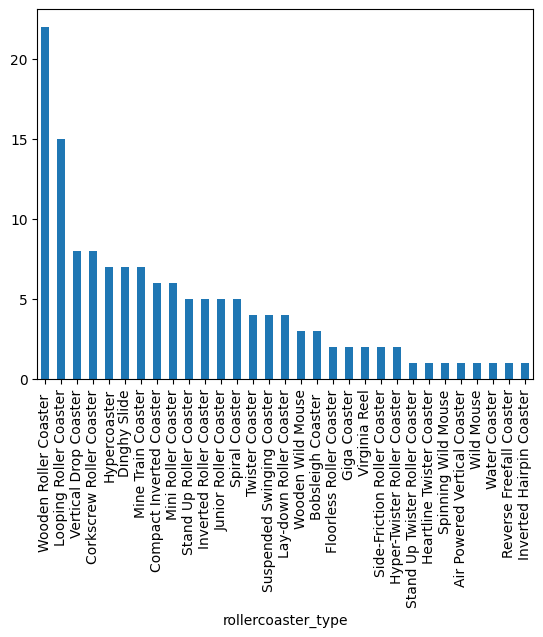

In [ ]:
# 기본 막대 그래프로 시각화


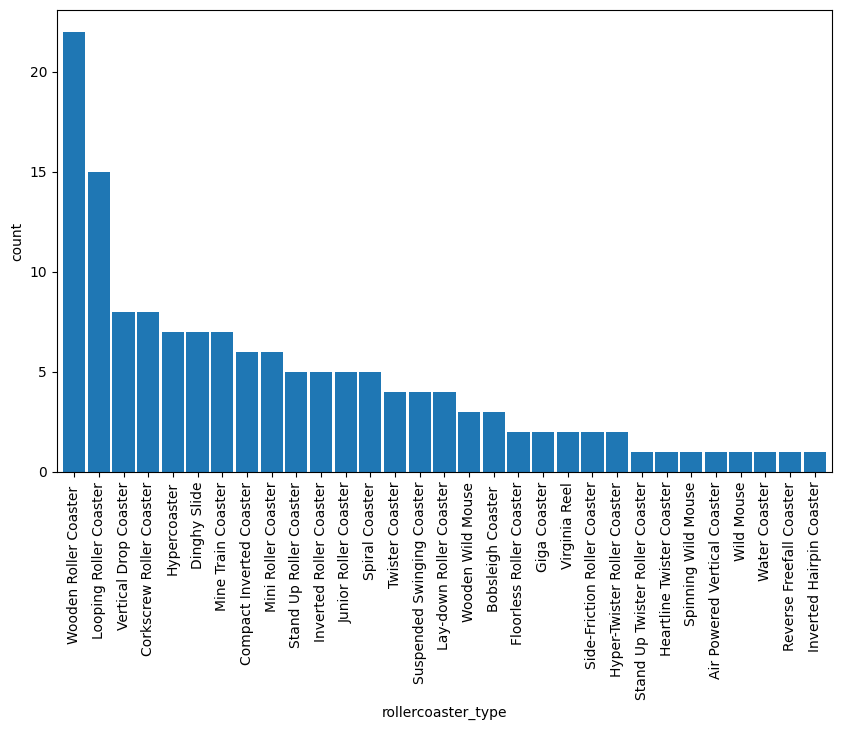

In [ ]:
# 막대그래프의 크기와 막대 너비 조정 및 x축과 y축 이름 출력


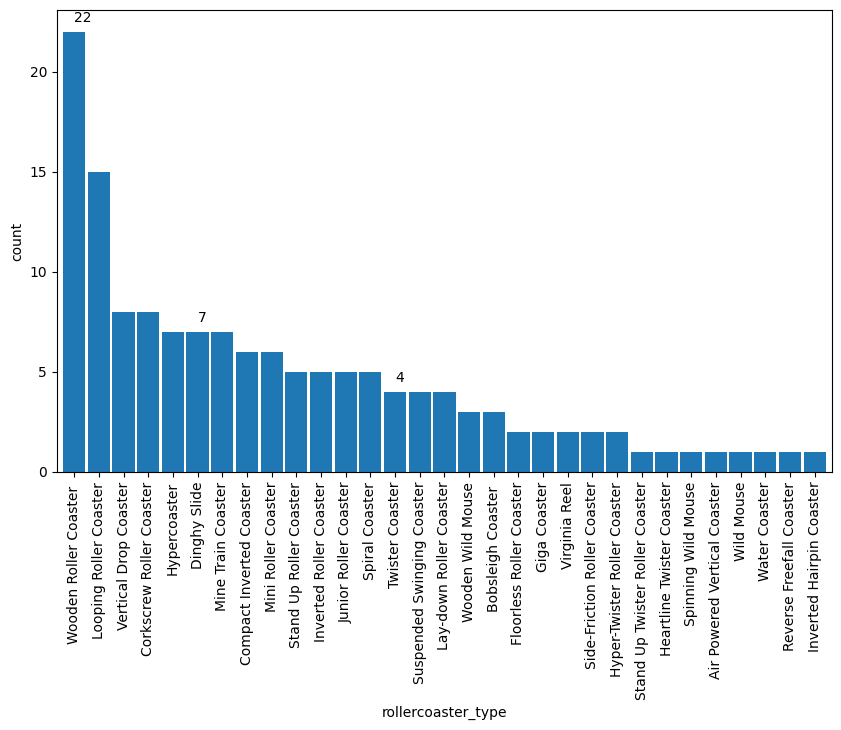

In [ ]:
# 막대 그래프의 막대에 문자열 출력
# plt.text(x축 위치, y축 위치, 출력할 내용)


/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_35629/2759689827.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, rollercoaster_type_count[i] + 0.5,
/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_35629/2759689827.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rollercoaster_type_count[i], va = 'center', ha = 'center') # 세로 정렬 : va, 가로 정렬 : ha


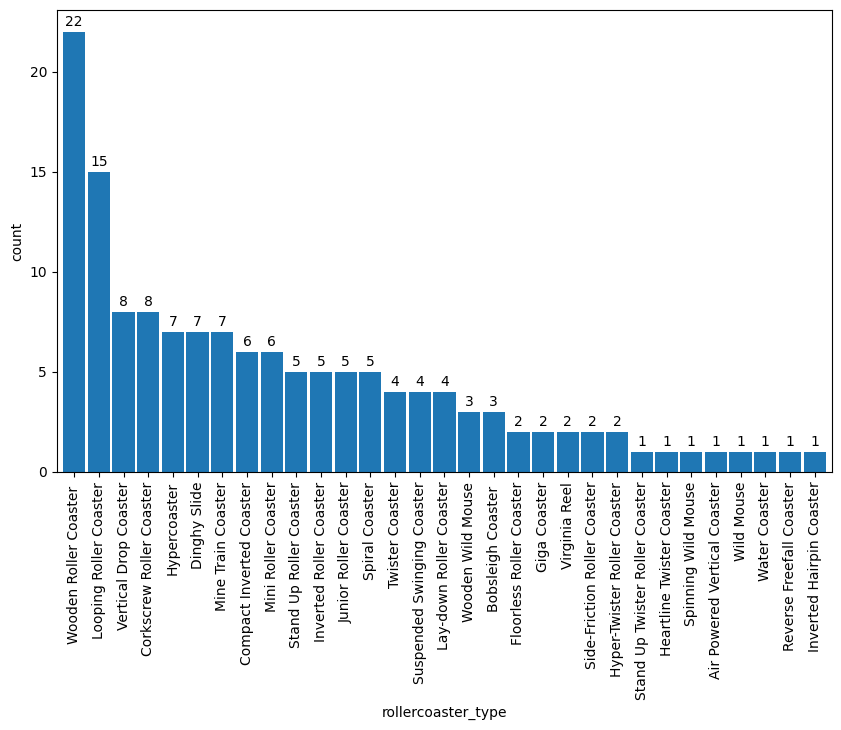

In [ ]:
# 반목문 사용하여 막대그래프의 막대에 문자열 출력


#### 탐색 정보 결과
- 롤러코스터 종류중 가장 많은 수를 차지하는 롤러코스터는 Wooden Roller Coaster인 것을 알 수 있다.

### 탐색 정보3 알아보기
- '최고 속도', '탑승 시간', '롤러코스터 길이', '최고 낙하 높이' 속성 중 '흥미도' 속성과 가장 관련이 깊은 속성은 무엇인지 알아보기

#### 상관관계 분석
- 어떤 속성과 관련이 깊은 속성이 무엇인지 알기 위해서는 먼저 속성 간의 관계를 수치로 파악하는 '상관관계 분석'을 실시해야함.
- 그 후 상관관계 분석 결과를 내림차순으로 정렬하여 흥미도 속성과 관련이 깊은 속성을 찾아야함.

In [ ]:
# 속성 중 숫자형 데이터만을 다루는 속성만 추출

# 각 속성 간의 상관관계를 구함.


,park_id,custom_design,excitement,intensity,nausea,max_speed,avg_speed,ride_time,ride_length,max_pos_gs,max_neg_gs,max_lateral_gs,total_air_time,drops,highest_drop_height,inversions
park_id,1.000000,0.275621,0.208506,0.170565,0.122935,0.286958,0.199232,0.112578,0.196867,0.235944,-0.086916,-0.019231,0.001091,0.038230,0.263336,0.550886
custom_design,0.275621,1.000000,-0.301970,-0.054868,-0.239727,-0.160095,-0.259485,0.044198,-0.145209,0.053533,-0.049630,0.117613,-0.395978,-0.171402,-0.150410,0.057233
excitement,0.208506,-0.301970,1.000000,0.218619,0.349712,0.500800,0.393300,0.310817,0.555398,0.296372,0.004703,0.147490,0.513925,0.207620,0.474213,0.143430
intensity,0.170565,-0.054868,0.218619,1.000000,0.195823,0.191066,0.149153,-0.006945,0.094163,0.150158,0.009947,0.236579,0.060871,-0.004128,0.192446,0.072356
nausea,0.122935,-0.239727,0.349712,0.195823,1.000000,0.193787,0.207210,0.122904,0.204650,0.199447,-0.018263,0.268021,0.164505,0.020387,0.145657,0.289689
max_speed,0.286958,-0.160095,0.500800,0.191066,0.193787,1.000000,0.659485,0.189501,0.503572,0.631194,-0.095027,0.099968,0.533315,0.016034,0.931333,0.060904
avg_speed,0.199232,-0.259485,0.393300,0.149153,0.207210,0.659485,1.000000,-0.158757,0.311627,0.350726,-0.018478,-0.038441,0.385321,0.000896,0.546266,0.117135
ride_time,0.112578,0.044198,0.310817,-0.006945,0.122904,0.189501,-0.158757,1.000000,0.830813,0.137502,-0.023241,0.075678,0.440037,0.236477,0.210949,0.028671
ride_length,0.196867,-0.145209,0.555398,0.094163,0.204650,0.503572,0.311627,0.830813,1.000000,0.341641,-0.026446,0.135384,0.658530,0.282959,0.463798,0.129033
max_pos_gs,0.235944,0.053533,0.296372,0.150158,0.199447,0.631194,0.350726,0.137502,0.341641,1.000000,-0.009395,0.291187,0.322130,0.121568,0.562459,0.283741


/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_35629/2073539820.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, corrExcitement[i] + 0.05,'%.2f'%corrExcitement[i], va = 'center', ha = 'center')


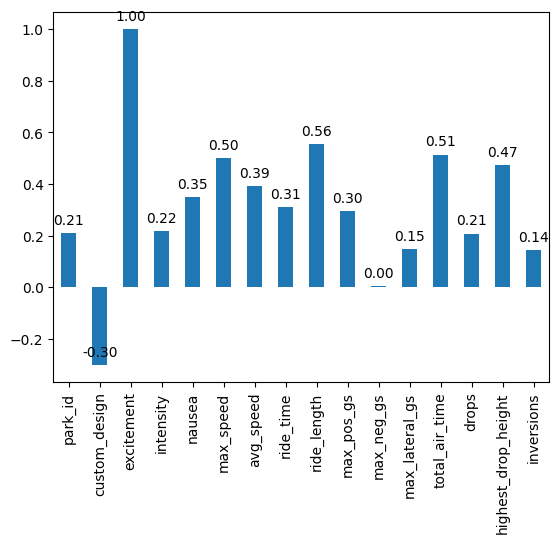

In [ ]:
# 흥미도 속성과 이외 속성들간의 상관관계만 추출하여 막대그래프로 추출

    # '%.2f'는 소수점 아래 둘째 자리까지의 실수로 출력하라는 의미
    
    

/var/folders/s0/flnd6hf15vs62n5vkdlhyg_m0000gn/T/ipykernel_35629/1106526704.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, corrExcitement[i] + 0.05, '%.2f'%corrExcitement[i], va = 'center', ha = 'center')


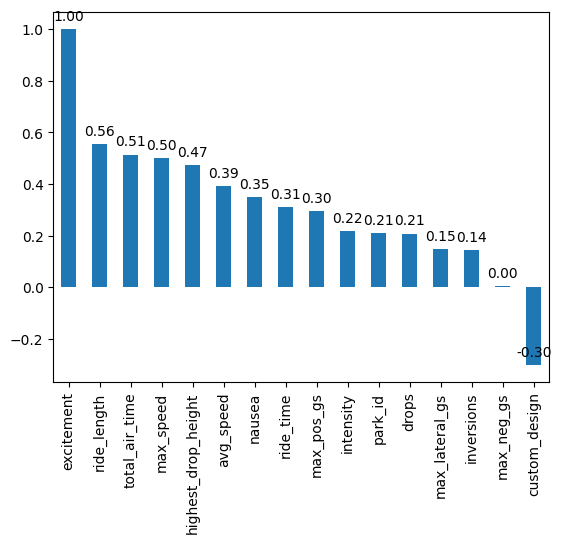

In [ ]:
# 흥미도 속성과 높은 상관관계를 보이는 속성을 sort_values() 메소드를 사용하여 내림차순으로 정렬


#### 탐색 정보 결과
- '흥미도' 속성과 관련 있는 속성은 '최고 속도' 속성과 '탑승 시간' 속성, '탑승길이', '가장 높은 떨어지는 구간의 높이'로
롤러코스터를 타는 고객들은 속도가 빠르고 탑승 길이와 시간이 길며 떨어지는 구간의 높이가 큰 롤러코스터를 좋아하는 것을 알 수 있다.

### +)상관관계
| 상관관계 $r$값의 절댓값 | 상관관계 정도 |
|---|---|
| 0.0 ~ 0.2 | 상관관계가 거의 없다. |
| 0.2 ~ 0.4 | 상관관계가 낮다. |
| 0.4 ~ 0.6 | 상관관계가 있다. |
| 0.6 ~ 0.8 | 상관관계가 높다. |
| 0.8 ~ 1.0 | 상관관계가 매우 높다. |